# 🎯 Student Score Prediction - Machine Learning Project

## Problem Statement
Predicting student academic performance is an important task in the education sector. This project aims to develop a machine learning model that predicts students' final scores based on various academic and lifestyle factors such as study hours, attendance, and previous exam results.

**Problem Type:** Regression  
**Target Variable:** Final Score  
**Approach:** Supervised Machine Learning


In [1]:
# Core libraries
import pandas as pd
import numpy as np

print("✅ Pandas & NumPy imported")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Matplotlib & Seaborn imported")

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

print("✅ Scikit-learn modules imported")
print("\n🎉 All libraries loaded successfully! Ready to start...")

✅ Pandas & NumPy imported
✅ Matplotlib & Seaborn imported
✅ Scikit-learn modules imported

🎉 All libraries loaded successfully! Ready to start...


## 1. Data Loading

In [2]:
df= pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2. Basic Data Cleaning
- Duplicate check
- Missing value check
- Data type validation

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

## 3. Exploratory Data Analysis (EDA)

In [10]:
df['average_score'] = (
    df['math score'] +
    df['reading score'] +
    df['writing score']
) / 3




In [11]:
df['average_score'].head()


0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: average_score, dtype: float64

In [12]:
df['average_score'].describe()


count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: average_score, dtype: float64

## 3.1: Target Variable Analysis

### Histogram


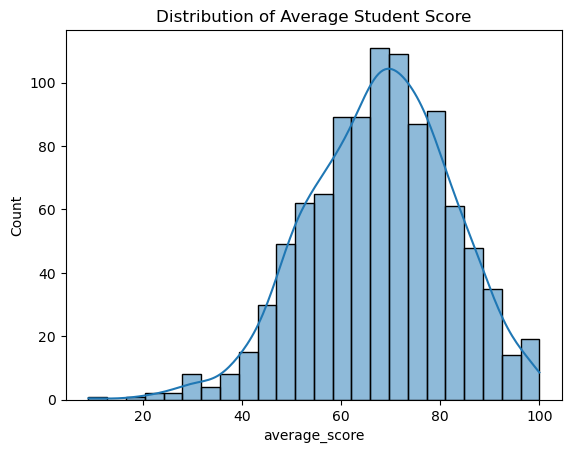

In [13]:
sns.histplot(df['average_score'], kde=True)
plt.title("Distribution of Average Student Score")
plt.show()

### Box Plot (Outlier Detection)

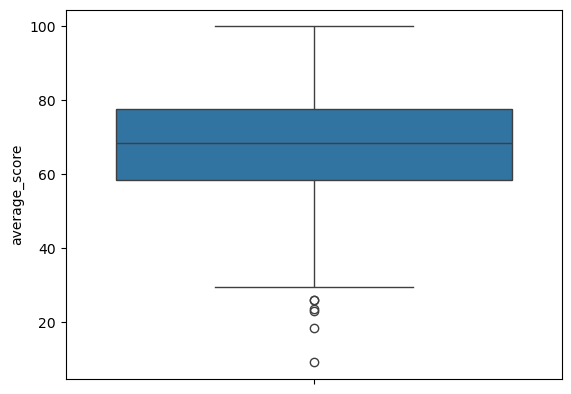

In [14]:
sns.boxplot(y=df['average_score'])
plt.show()

### 🎯 Target Variable Analysis

- The target variable `average_score` is continuous, making this a regression problem.
- The distribution of average scores is approximately normal.
- Scores range between realistic academic values.
- No extreme anomalies observed in the target variable.


## 3.2: Numerical Feature Analysis

In [15]:
num_cols = ['math score', 'reading score', 'writing score']
num_cols


['math score', 'reading score', 'writing score']

In [16]:
df[num_cols].describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Histogram

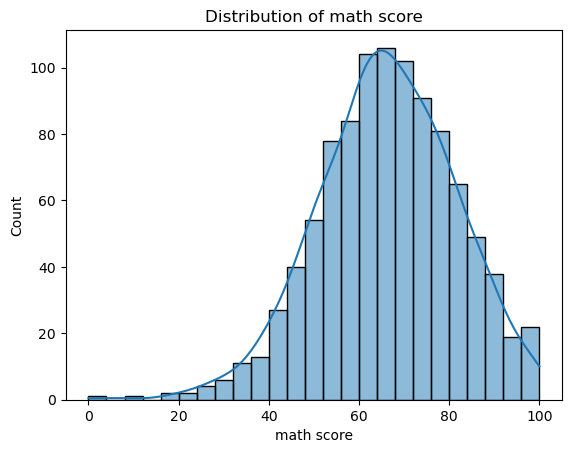

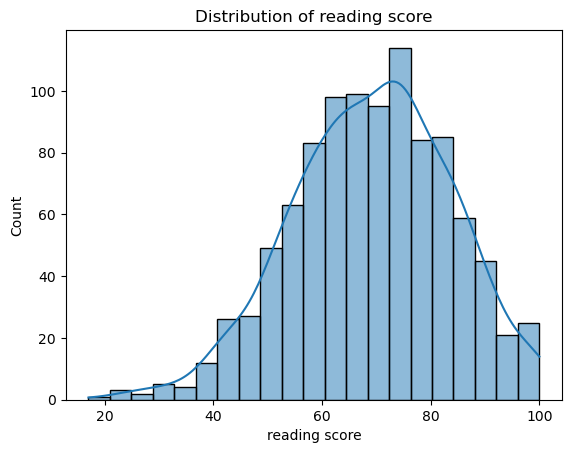

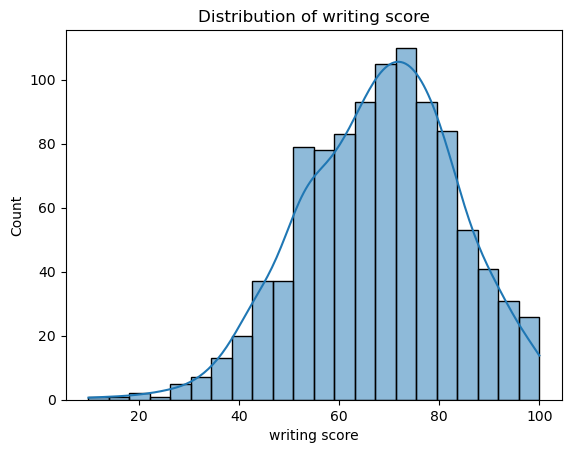

In [17]:
for col in num_cols:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Box Plot (Outlier Detection)

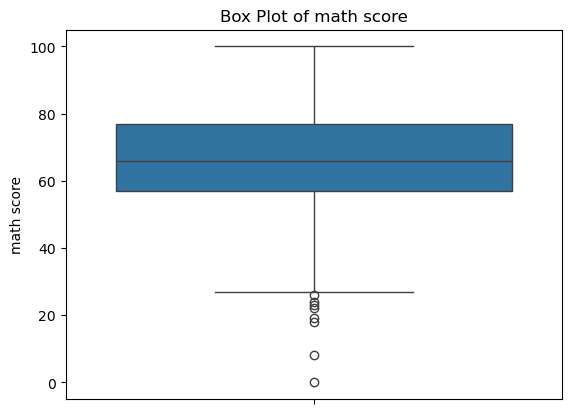

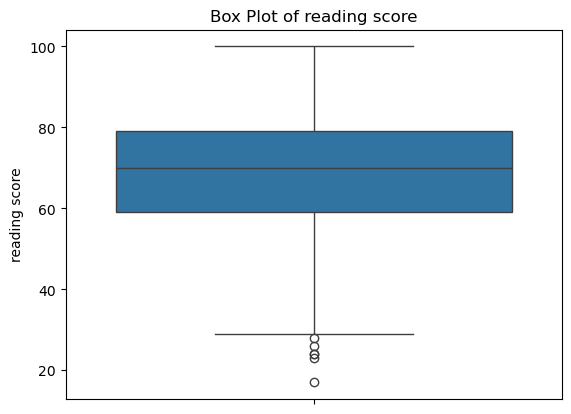

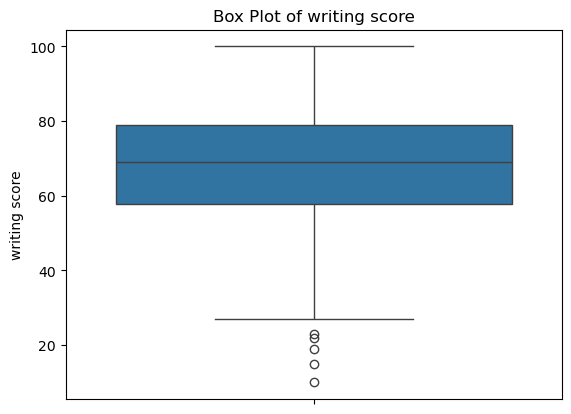

In [18]:
for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

### Scatter Plot

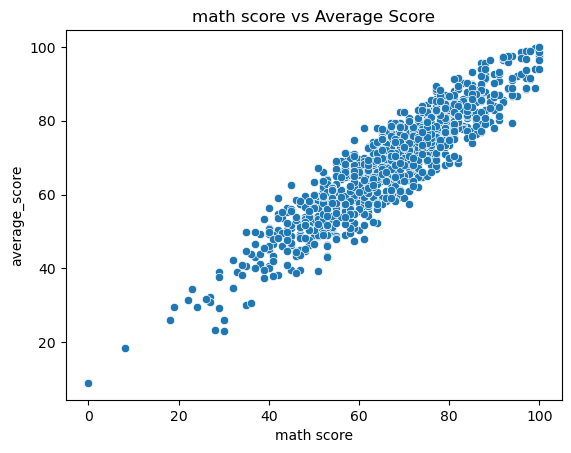

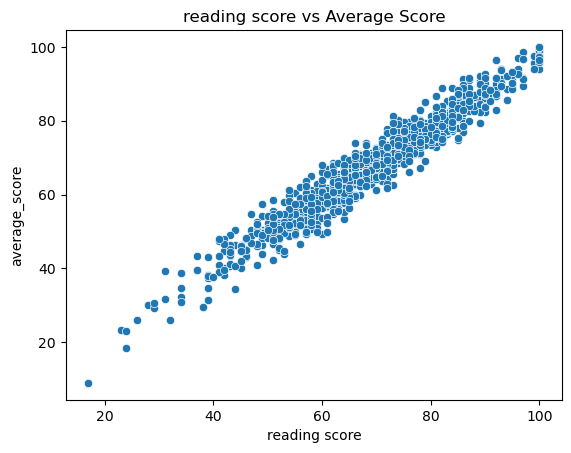

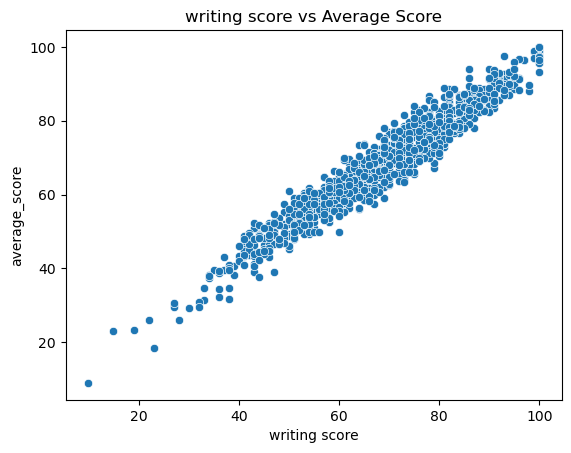

In [19]:
for col in num_cols:
    sns.scatterplot(x=df[col],y=df['average_score'])
    plt.title(f"{col} vs Average Score")
    plt.show()

### 🔢 Numerical Features Analysis

- Math, reading, and writing scores show approximately normal distributions.
- Writing and reading scores appear less variable compared to math scores.
- No extreme outliers were observed that require immediate removal.
- All numerical features show a strong positive relationship with the target variable.


## 3.3: Categorical Feature Analysis

In [20]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

### Gender Distribution

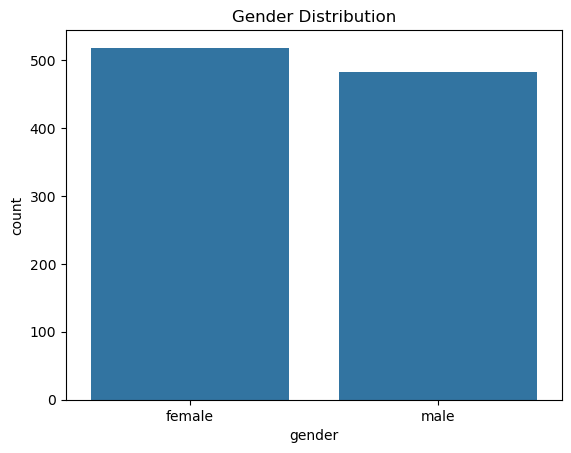

In [21]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

### Lunch Type Distribution

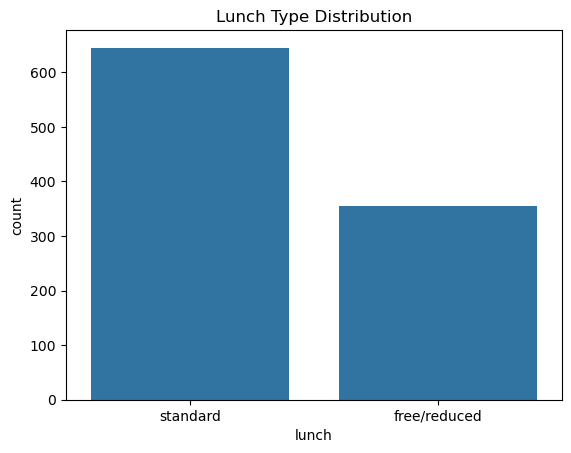

In [22]:
sns.countplot(x='lunch', data=df)
plt.title("Lunch Type Distribution")
plt.show()


### Test Preparation

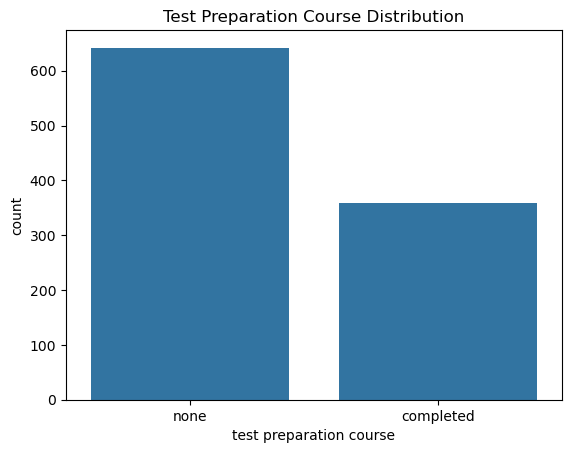

In [23]:
sns.countplot(x='test preparation course', data=df)
plt.title("Test Preparation Course Distribution")
plt.show()


### Categorical Feature vs Target

### Gender vs Average Score

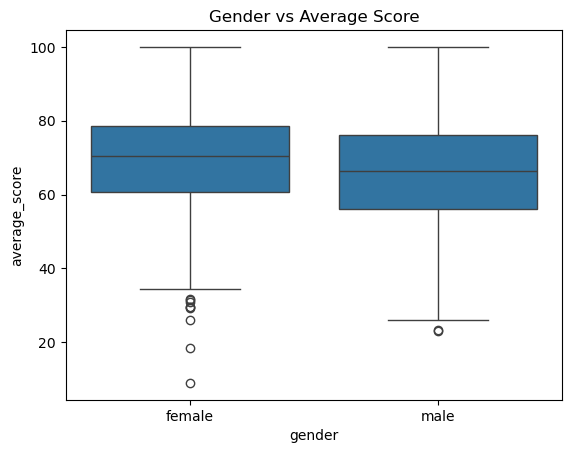

In [24]:
sns.boxplot(x='gender', y='average_score', data=df)
plt.title("Gender vs Average Score")
plt.show()

### Lunch vs Average Score

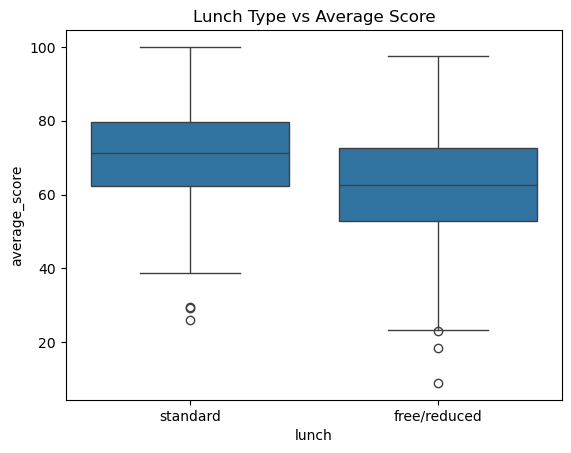

In [25]:
sns.boxplot(x='lunch', y='average_score', data=df)
plt.title("Lunch Type vs Average Score")
plt.show()


### Test Preparation vs Average Score

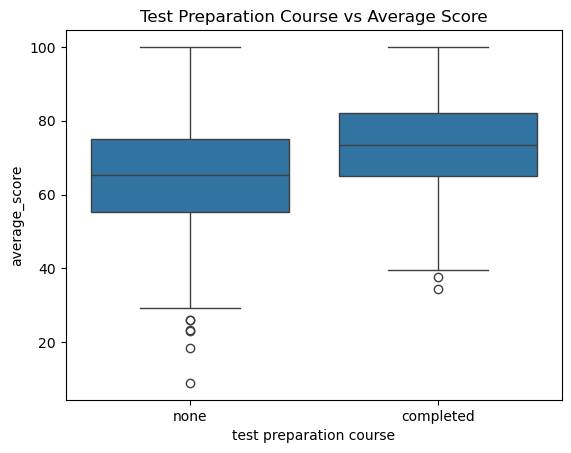

In [26]:
sns.boxplot(
    x='test preparation course',
    y='average_score',
    data=df
)
plt.title("Test Preparation Course vs Average Score")
plt.show()


### Parental Education vs Average Score

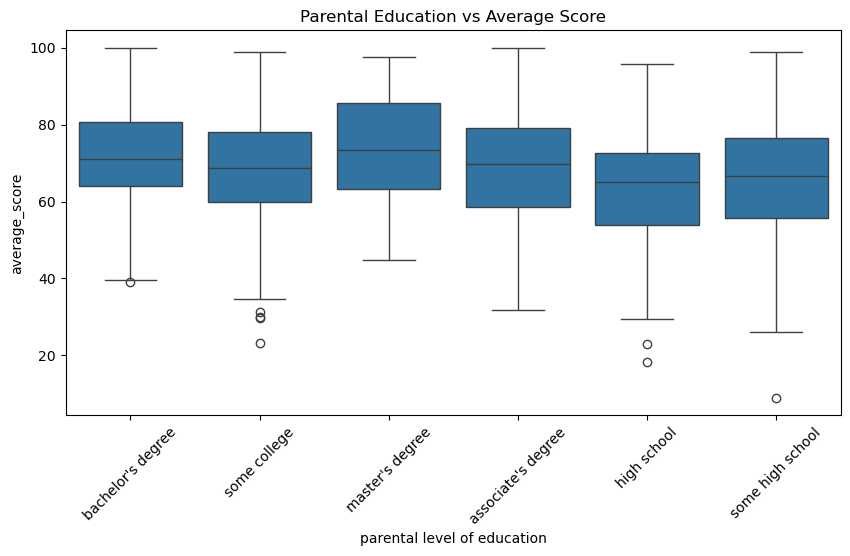

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x='parental level of education',
    y='average_score',
    data=df
)
plt.xticks(rotation=45)
plt.title("Parental Education vs Average Score")
plt.show()


### 🧩 Categorical Feature Analysis

- Gender shows slight differences in average performance, but the gap is not extreme.
- Students with standard lunch generally perform better than those with free/reduced lunch.
- Test preparation course completion has a positive impact on student scores.
- Higher parental education levels are associated with better student performance.


## 3.4: Correlation Analysis (Numerical)

In [28]:
num_corr_cols = [
    'math score',
    'reading score',
    'writing score',
    'average_score']

In [29]:
corr_matrix=df[num_corr_cols].corr()
corr_matrix

,math score,reading score,writing score,average_score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
average_score,0.918746,0.970331,0.965667,1.000000


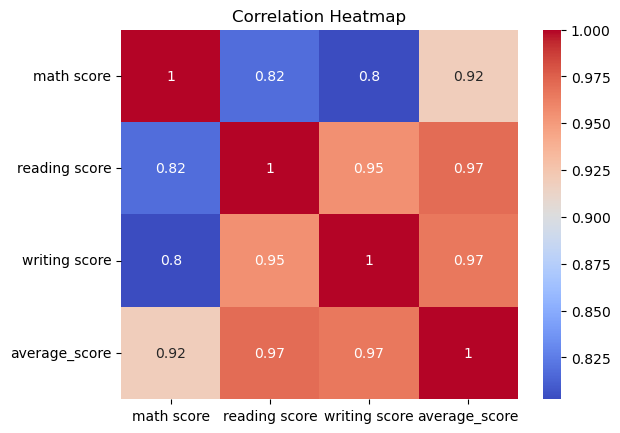

In [30]:
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### 🔗 Correlation Analysis

- All numerical features show a strong positive correlation with the target variable.
- Reading and writing scores are highly correlated with each other.
- Math score also has a strong relationship with average score.
- Potential multicollinearity exists among subject scores, which will be considered during modeling.


## 🔍 EDA Insights

- Average score follows an approximately normal distribution.
- Students who completed the test preparation course generally achieved higher scores.
- Reading and writing scores are highly correlated.
- Parental level of education shows a positive relationship with student performance.
- No extreme outliers that require immediate removal.
- Math score is used as the target variable for modeling to avoid target leakage.


## 4. Feature Engineering

### Target & Feature Separation

In [31]:
X = df.drop(columns=['math score', 'average_score'])
y = df['math score']

### Handle Categorical Variables(One-Hot Encoding for Multi-category)

In [32]:
X_encoded = pd.get_dummies(X, drop_first=True)

### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

### Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## 5. Model Selection

### Import Models

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

### Train Linear Regression

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

### Evaluate Model

In [37]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)

Linear Regression
MAE: 4.214763142474851
RMSE: 5.393993869732843
R2: 0.8804332983749564


### Train Ridge Regression

In [38]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)          

In [39]:
print("Ridge R2:", r2_score(y_test, y_pred_ridge))

Ridge R2: 0.8805470058449049


### Train Lasso Regression

In [40]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
print("Lasso R2:", r2_score(y_test, y_pred_lasso))

Lasso R2: 0.8807001947007775


### Random Forest

In [41]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest R2: 0.8521218267549737


### How to Choose Best Model?

In [42]:
models = {
    "Linear": y_pred_lr,
    "Ridge": y_pred_ridge,
    "Lasso": y_pred_lasso,
    "RandomForest": y_pred_rf
}

for name, preds in models.items():
    print(name, "R2:", r2_score(y_test, preds))

Linear R2: 0.8804332983749564
Ridge R2: 0.8805470058449049
Lasso R2: 0.8807001947007775
RandomForest R2: 0.8521218267549737


## 6. Final Model Training & Optimization

### Hyperparameter Tuning (Lasso)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10]
}

lasso = Lasso(max_iter=10000)

grid = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring="r2"
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]}, scoring='r2')

In [44]:
print("Best alpha:", grid.best_params_)

Best alpha: {'alpha': 0.01}


### Train Final Lasso Model

In [45]:
final_model = grid.best_estimator_
final_model.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=10000)

### Final Evaluation

In [46]:
final_predictions = final_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print("Final Model Performance")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Final Model Performance
MAE: 4.209106566083279
RMSE: 5.387970280339741
R2: 0.8807001947007775


- The optimized Lasso Regression model achieved an R² score of 0.88 with a mean absolute error of approximately 4 marks on the test set.

## 7. Feature Importance & Interpretation

### Feature Names

In [47]:
feature_names = X_encoded.columns

### Lasso Coefficients

In [48]:
coefficients = final_model.coef_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

importance_df = importance_df.sort_values(by='Coefficient', ascending=False)
importance_df

,Feature,Coefficient
1,writing score,10.911286
2,gender_male,6.506965
0,reading score,3.501027
6,race/ethnicity_group E,1.694968
12,lunch_standard,1.679969
13,test preparation course_none,1.553498
10,parental level of education_some college,0.397142
8,parental level of education_high school,0.345022
11,parental level of education_some high school,0.265735
3,race/ethnicity_group B,0.139315


### Top Important Features

In [49]:
importance_df.head(10)

,Feature,Coefficient
1,writing score,10.911286
2,gender_male,6.506965
0,reading score,3.501027
6,race/ethnicity_group E,1.694968
12,lunch_standard,1.679969
13,test preparation course_none,1.553498
10,parental level of education_some college,0.397142
8,parental level of education_high school,0.345022
11,parental level of education_some high school,0.265735
3,race/ethnicity_group B,0.139315


In [50]:
importance_df.tail(10)

,Feature,Coefficient
12,lunch_standard,1.679969
13,test preparation course_none,1.553498
10,parental level of education_some college,0.397142
8,parental level of education_high school,0.345022
11,parental level of education_some high school,0.265735
3,race/ethnicity_group B,0.139315
7,parental level of education_bachelor's degree,-0.227983
5,race/ethnicity_group D,-0.247694
4,race/ethnicity_group C,-0.276896
9,parental level of education_master's degree,-0.327128


### Visualize Feature Importance

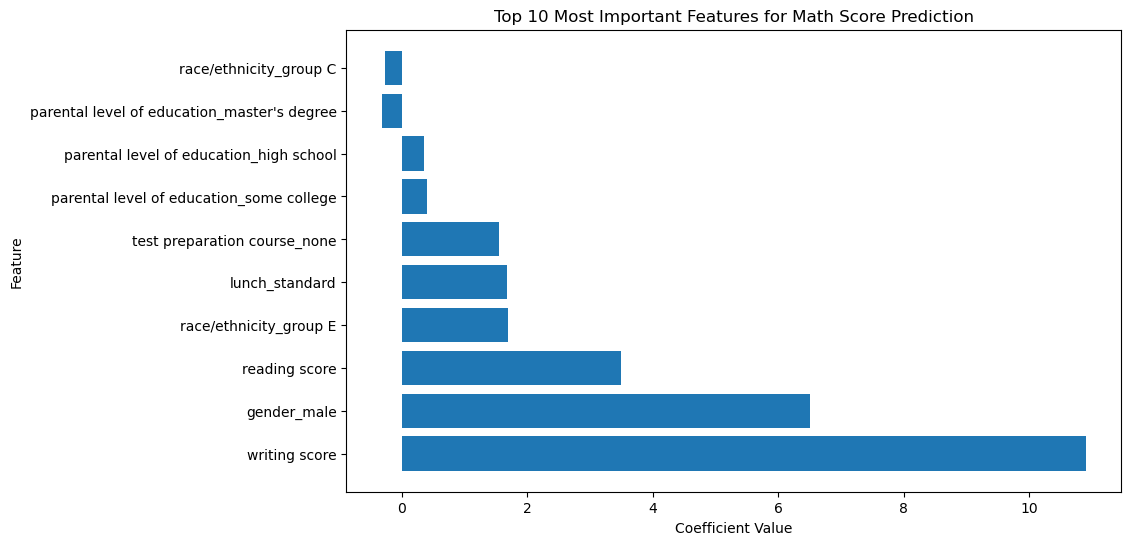

In [51]:
import matplotlib.pyplot as plt

top_features = importance_df.sort_values(by='Coefficient', key=abs, ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.title("Top 10 Most Important Features for Math Score Prediction")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

- The strongest predictors of Math score were writing score, gender, and reading score, indicating that overall academic ability is the key driver of math performance.

## 8. Model Evaluation

### Actual vs Predicted Visualization

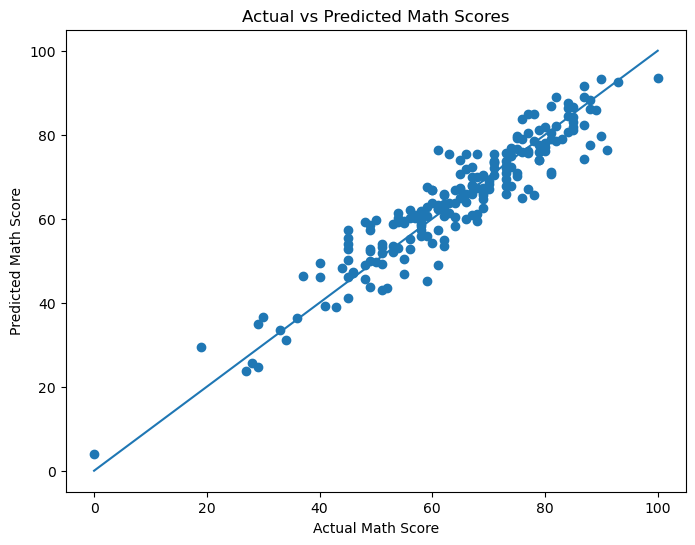

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, final_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.show()

### Residual Analysis

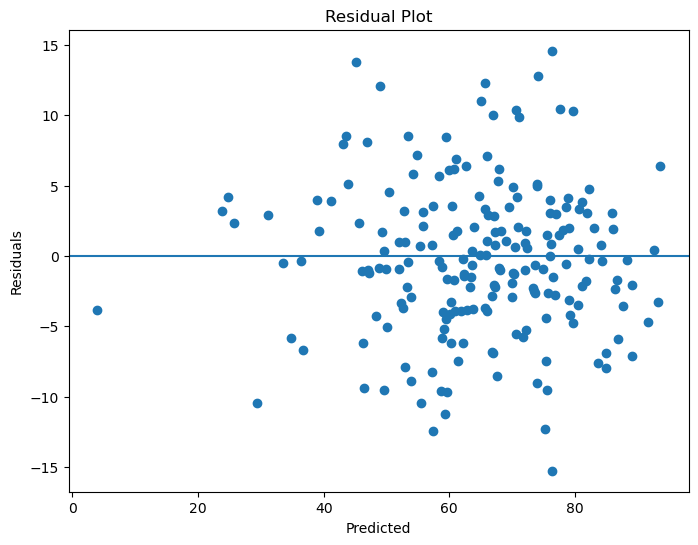

In [53]:
residuals = y_test - final_predictions

plt.figure(figsize=(8,6))
plt.scatter(final_predictions, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Final Model Performance

The optimized Lasso Regression model achieved:

- R² Score: 0.88  
- Mean Absolute Error: ~4 marks  
- RMSE: ~5.4  

This indicates that the model can predict student Math scores with high accuracy and low error.

## 9. Model Validation & Robustness Check

### Cross-Validation

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [56]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

In [58]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', Lasso(alpha=0.01))
])

In [59]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    lasso_pipeline,
    X,
    y,
    cv=5,
    scoring='r2'
)

print("CV R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

CV R² scores: [0.88215311 0.86739679 0.84410059 0.8850396  0.88091197]
Mean CV R²: 0.8719204135459776


- Cross-validation was performed using a preprocessing + modeling pipeline to avoid data leakage and ensure robust evaluation on categorical features.